# Introduction to neural network classification with tensorflow

In this notebook we're goinf to learn how to write neural networks for classification problems.

Types of classification problems:
* Binary classification
* Multiclass Classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples= n_samples,
noise= 0.03,
random_state= 42)

In [2]:
X.shape

(1000, 2)

In [3]:
y.shape

(1000,)

OUr data is little hard to understand right now... let's visualise

In [4]:
import pandas as pd
circles= pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "label": y
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


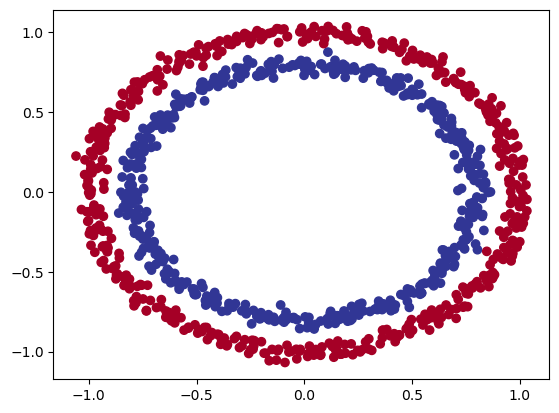

In [5]:
# Visualise with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.RdYlBu)

## Input and Output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

Steps in modelling:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate
5. Tweak
6. Repeat

# Import tensorflow

In [7]:
import tensorflow as tf

In [8]:
tf.random.set_seed(42) 

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

model.fit(X, y, epochs= 5)

Epoch 1/5
 1/32 [..............................] - ETA: 4s - loss: 6.1402 - accuracy: 0.4062

2024-01-29 22:55:01.325558: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 491us/step - loss: 5.5923 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 435us/step - loss: 5.5757 - accuracy: 0.4840
Epoch 3/5
32/32 [==============================] - 0s 423us/step - loss: 5.5612 - accuracy: 0.4820
Epoch 4/5
32/32 [==============================] - 0s 350us/step - loss: 5.5495 - accuracy: 0.4820
Epoch 5/5
32/32 [==============================] - 0s 316us/step - loss: 5.5372 - accuracy: 0.4820


In [9]:
# Let's try and imporve our model by training longer
model.fit(X, y, epochs= 200, verbose= 0)
model.evaluate(X, y)

32/32 [==============================] - 0s 326us/step - loss: 0.8439 - accuracy: 0.4820


[0.8439006805419922, 0.4819999933242798]

Since we are workling on a binary classification problem and our model is getting around 50% accuracy, it's performing as it is guessing.

So let's step things up and add an extra layer.

In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['accuracy'])

model_1.fit(X, y, epochs= 100, verbose= 0)

In [11]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 369us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [12]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

# Improving our model

Let's look in to our bag of tricks to see how we can imporve our model.

1. Create a model - We might want to:
    1. Add more layers
    2. Add more units
2. Compiling a model: We might want to:
    1. Choose a different optimiser function
3. Fitting a model: We might fit for more epochs

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(), 
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X, y, epochs= 100, verbose= 0)

In [14]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 385us/step - loss: 0.6957 - accuracy: 0.5020


[0.6956793069839478, 0.5019999742507935]

In [15]:
y_pred = model_2.predict(X)
y_pred

32/32 [==============================] - 0s 312us/step


array([[0.50112534],
       [0.5225527 ],
       [0.5246165 ],
       [0.5450076 ],
       [0.44663265],
       [0.54559064],
       [0.5444255 ],
       [0.49639723],
       [0.46245757],
       [0.55780995],
       [0.48368016],
       [0.5367476 ],
       [0.54767406],
       [0.47154987],
       [0.46033546],
       [0.4579622 ],
       [0.49929747],
       [0.4577975 ],
       [0.51011074],
       [0.4730094 ],
       [0.51486295],
       [0.55638504],
       [0.44920495],
       [0.5038549 ],
       [0.54124725],
       [0.52806115],
       [0.54868746],
       [0.47951627],
       [0.4564914 ],
       [0.4658498 ],
       [0.45906037],
       [0.55803454],
       [0.5430051 ],
       [0.4852772 ],
       [0.4465725 ],
       [0.55139315],
       [0.5414845 ],
       [0.5318739 ],
       [0.45773205],
       [0.52298653],
       [0.47073156],
       [0.54516566],
       [0.4777359 ],
       [0.47474238],
       [0.48493662],
       [0.49849167],
       [0.45508435],
       [0.539

To visualise our model's predictions, let's create a function 'plot_decision_boundary()'. This function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different feature values
* Make predictions across the meshgrid* Plot the predictions as well as a line between zones

In [16]:
import numpy as np

In [17]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.8)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

  1/319 [..............................] - ETA: 3s

319/319 [==============================] - 0s 259us/step
doing binary classification


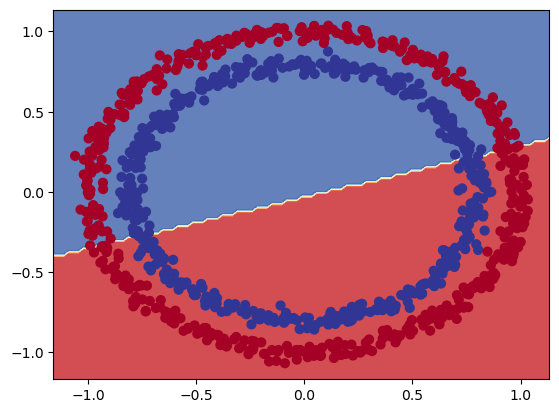

In [18]:
# Check out the predictions our model is making

plot_decision_boundary(model= model_2,
                       X= X, 
                       y= y)

In [19]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = X_regression[:150], X_regression[150:], y_regression[:150], y_regression[150:]

model_2.fit(X_reg_train, y_reg_train)

ValueError: in user code:

    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But we are now working on a regression problem, let's change the model to suit our data

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]) 

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['mae'])

model_3.fit(tf.expand_dims(X_reg_train, axis= 1), y_reg_train, epochs= 100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 408.9070 - mae: 408.9070
Epoch 2/100
5/5 [==============================] - 0s 692us/step - loss: 270.0095 - mae: 270.0095
Epoch 3/100
5/5 [==============================] - 0s 764us/step - loss: 134.9435 - mae: 134.9435
Epoch 4/100
5/5 [==============================] - 0s 656us/step - loss: 52.1752 - mae: 52.1752
Epoch 5/100
5/5 [==============================] - 0s 696us/step - loss: 86.8978 - mae: 86.8978
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 68.2053 - mae: 68.2053
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 44.3895 - mae: 44.3895
Epoch 8/100
5/5 [==============================] - 0s 861us/step - loss: 51.0354 - mae: 51.0354
Epoch 9/100
5/5 [==============================] - 0s 766us/step - loss: 42.4355 - mae: 42.4355
Epoch 10/100
5/5 [==============================] - 0s 693us/step - loss: 44.2964 - mae: 44.2964
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 1ms/step


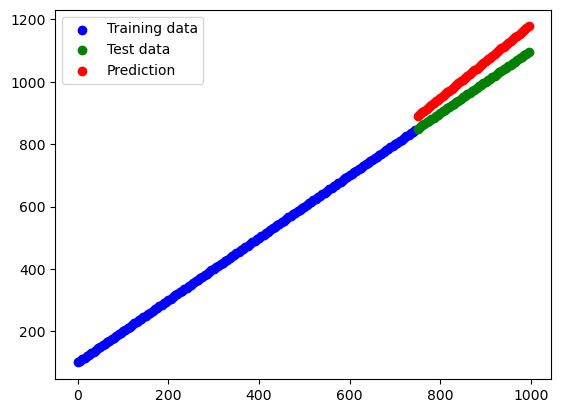

In [21]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(X_reg_test)

#Plot the model's prediction against our regression data
plt.figure(figure = (10, 7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label= "Training data")
plt.scatter(X_reg_test, y_reg_test, c= 'g', label= 'Test data')
plt.scatter(X_reg_test, y_reg_pred, c='r', label= 'Prediction')
plt.legend()

## The missing piece: Non-linearity

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'linear')
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

model_4.fit(X, y, epochs= 100)

Epoch 1/100


32/32 [==============================] - 0s 528us/step - loss: 6.0875 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 445us/step - loss: 6.0722 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 409us/step - loss: 6.0401 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 319us/step - loss: 5.9950 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 330us/step - loss: 5.9757 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 333us/step - loss: 5.9746 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 321us/step - loss: 5.9734 - accuracy: 0.4810
Epoch 8/100
32/32 [==============================] - 0s 338us/step - loss: 5.9628 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 315us/step - loss: 5.9496 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 319us/step - loss: 5.9308 - accuracy: 0.4800
E

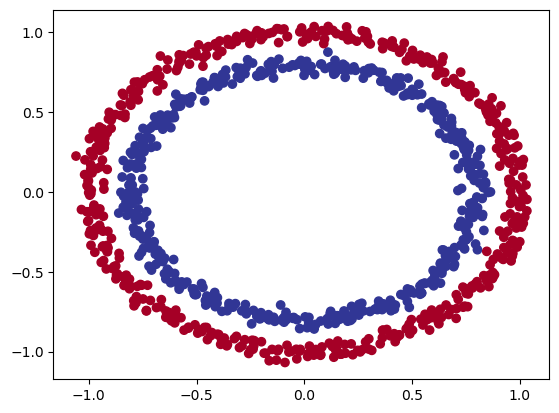

In [23]:
#Check out our data
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= plt.cm.RdYlBu)

319/319 [==============================] - 0s 226us/step
doing binary classification


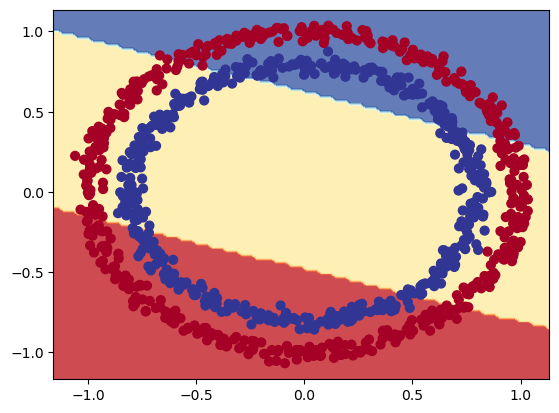

In [24]:
#Check the dedcision boundary for our latest model
plot_decision_boundary(model= model_4,
                       X=X, y=y)

Let's create our first neural network with a non-linear activation function

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'relu')
])

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

history = model_5.fit(X, y, epochs= 100)

Epoch 1/100
32/32 [==============================] - 0s 545us/step - loss: 6.5364 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 451us/step - loss: 6.5246 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 398us/step - loss: 6.5222 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 328us/step - loss: 6.5214 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 312us/step - loss: 6.5115 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 393us/step - loss: 6.5002 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 383us/step - loss: 6.4982 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 322us/step - loss: 6.4979 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 346us/step - loss: 6.4971 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 377us/step - loss: 6.4965 - accura

319/319 [==============================] - 0s 242us/step
doing binary classification


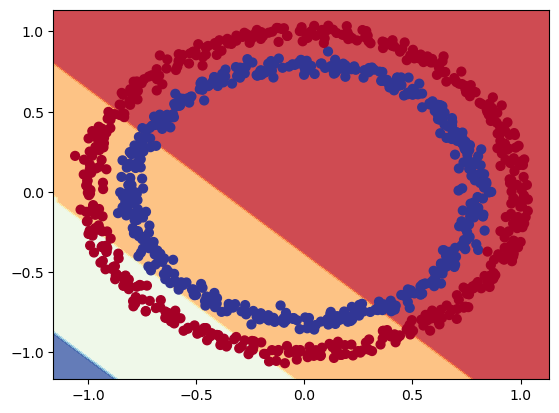

In [26]:
plot_decision_boundary(model_5, X, y)

In [27]:
# Time to replicate the mutli-layer neural network from Tensorflow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= ['accuracy'])

history = model_6.fit(X, y, epochs= 250, verbose= 0)

In [28]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 389us/step - loss: 0.0462 - accuracy: 0.9960


[0.046241920441389084, 0.9959999918937683]

319/319 [==============================] - 0s 244us/step
doing binary classification


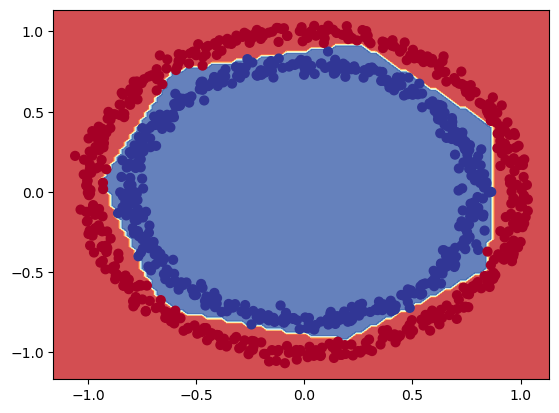

In [29]:
# How do our model prediction look
plot_decision_boundary(model= model_6, X= X,y= y)
plt.show()

In [30]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'softmax')
])

model_7.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics=['accuracy'])

model_7.fit(X, y, epochs= 250, verbose= 0)

In [31]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 392us/step - loss: 0.0318 - accuracy: 0.5000


[0.03179176151752472, 0.5]

319/319 [==============================] - 0s 250us/step
doing binary classification


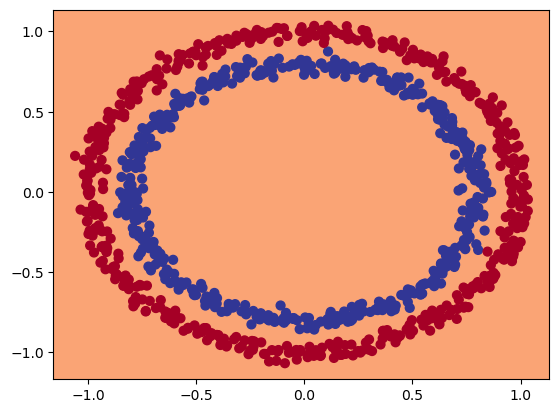

In [32]:
plot_decision_boundary(model_7, X, y)

**Question**: What's wrong with the prediction we've made? Are we really evaluating our model correctly? Hint: What dazta did the model learn on and what data di we predict on.

**Noteo**: Thew combination of **linear** and **non-linear** is one of the key fundamentals of neural networks.

Let's implement linear and non-linear concepts

In [33]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

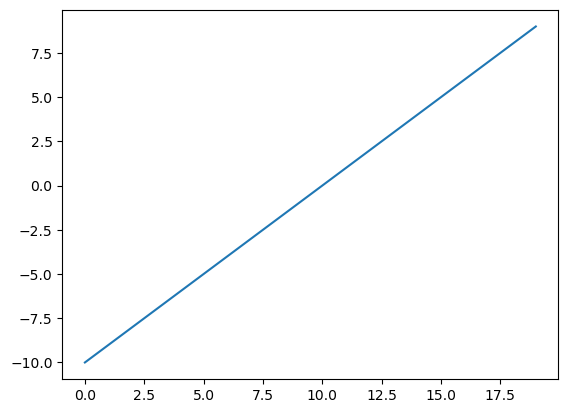

In [34]:
#Visualise our toy tensor

plt.plot(A)

In [35]:
# Let's start replicating sigmoid function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535017e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

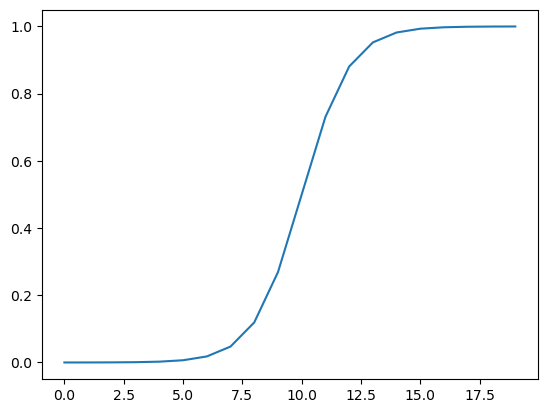

In [36]:
# Plot our toy tensor transformed into sigmoid
plt.plot(sigmoid(A))

In [37]:
def relu(x):
    return tf.maximum(x, 0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

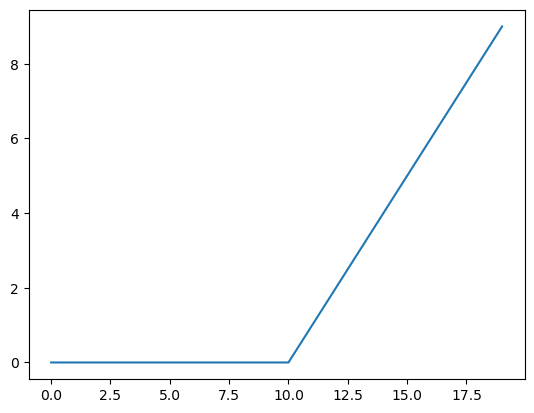

In [38]:
plt.plot(relu(A))

In [39]:
def linear(x):
    return x

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

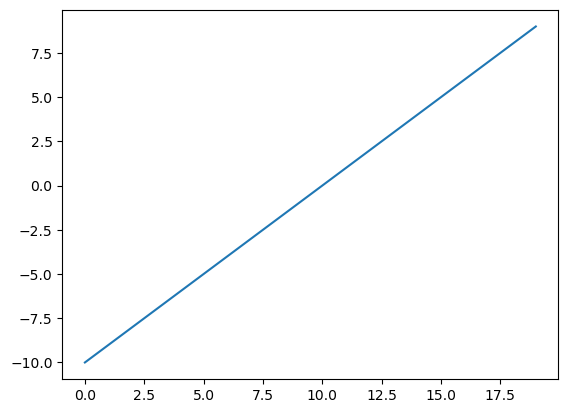

In [40]:
plt.plot(linear(A))

**Reesource**: [Activation function link](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Evaluating and improving our classification

So far we've been training and testing on the same data set

Let's cerate a training and test set

In [41]:
X.shape

(1000, 2)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 12        
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [45]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_8.compile(loss= 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics= ['accuracy'])

history_8 = model_8.fit(X_train, y_train, epochs= 25)

Epoch 1/25


25/25 [==============================] - 0s 594us/step - loss: 0.6919 - accuracy: 0.4800
Epoch 2/25
25/25 [==============================] - 0s 502us/step - loss: 0.6874 - accuracy: 0.5325
Epoch 3/25
25/25 [==============================] - 0s 447us/step - loss: 0.6818 - accuracy: 0.5600
Epoch 4/25
25/25 [==============================] - 0s 434us/step - loss: 0.6770 - accuracy: 0.5625
Epoch 5/25
25/25 [==============================] - 0s 330us/step - loss: 0.6719 - accuracy: 0.5600
Epoch 6/25
25/25 [==============================] - 0s 357us/step - loss: 0.6661 - accuracy: 0.5850
Epoch 7/25
25/25 [==============================] - 0s 334us/step - loss: 0.6582 - accuracy: 0.5788
Epoch 8/25
25/25 [==============================] - 0s 348us/step - loss: 0.6470 - accuracy: 0.5888
Epoch 9/25
25/25 [==============================] - 0s 326us/step - loss: 0.6354 - accuracy: 0.6375
Epoch 10/25
25/25 [==============================] - 0s 341us/step - loss: 0.6129 - accuracy: 0.6787
Epoch 11/2

In [46]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 571us/step - loss: 0.1069 - accuracy: 0.9850


[0.10688760131597519, 0.9850000143051147]

319/319 [==============================] - 0s 246us/step
doing binary classification
319/319 [==============================] - 0s 236us/step
doing binary classification


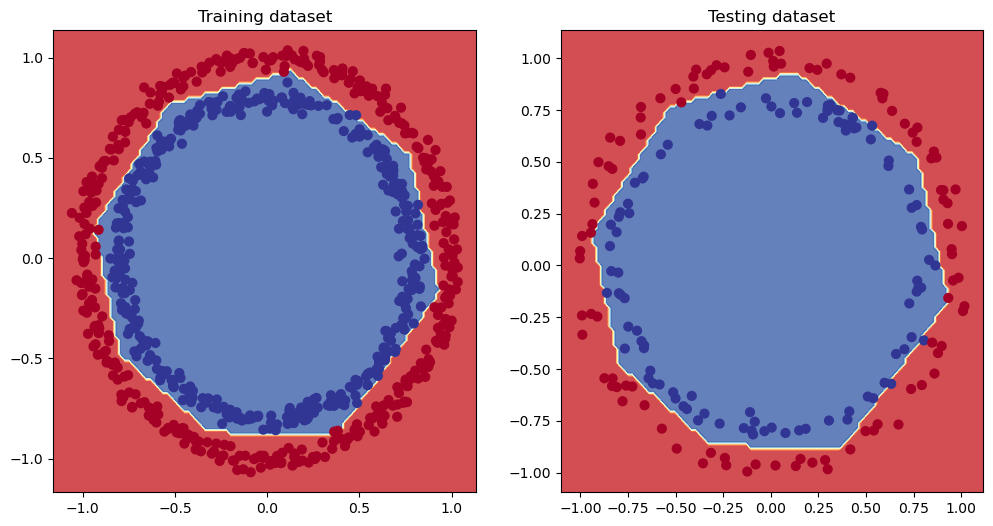

In [47]:
# Plot for both training and test set
plt.figure(figsize= (12, 6))

plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing dataset")
plot_decision_boundary(model_8, X_test, y_test)

## Plot the loss curves

In [48]:
# Convert the history object into a dataframe

pd.DataFrame(history_8.history)

,loss,accuracy
0,0.691908,0.48000
1,0.687444,0.53250
2,0.681770,0.56000
3,0.677018,0.56250
4,0.671898,0.56000
5,0.666053,0.58500
6,0.658175,0.57875
7,0.647036,0.58875
8,0.635365,0.63750
9,0.612942,0.67875


<Axes: >

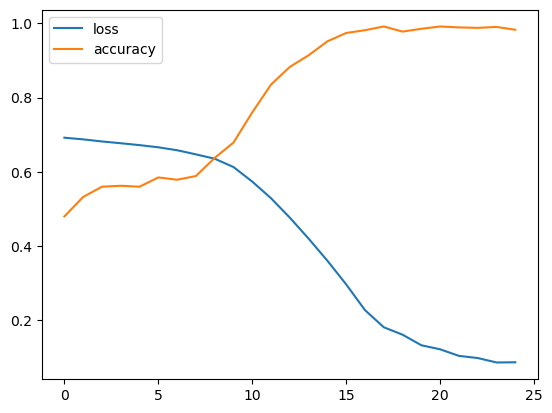

In [49]:
# Plot the loss curves

pd.DataFrame(history_8.history).plot()

**Note**: For many problems, the loss function going down means it is improving.

## Finding the best learning rate

To find the ideal learning rate, we're going to use the following steps:

1. A learing rate **callback** - an extra functionality added to the model **while** training it

2. Another model.

3. A modified loss curve.

In [50]:
# Set random seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_9.compile(loss= 'binary_crossentropy',
                optimizer= "Adam",
                metrics= ['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

#Fit the model
histor_9 = model_9.fit(X_train, y_train, 
                       epochs= 100,
                       callbacks= [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 549us/step - loss: 0.7447 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 514us/step - loss: 0.7427 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 474us/step - loss: 0.7405 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 402us/step - loss: 0.7382 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 354us/step - loss: 0.7360 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 363us/step - loss: 0.7335 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 383us/step - loss: 0.7310 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 386us/step - loss: 0.7285 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: >

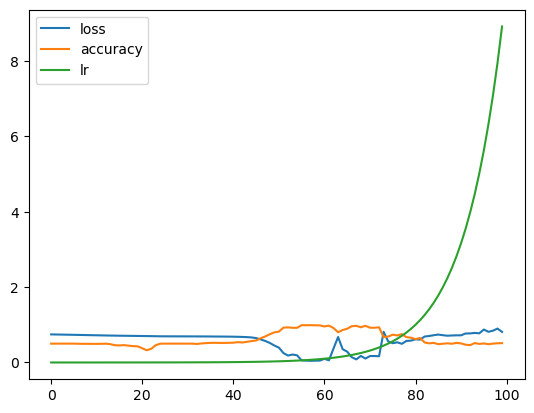

In [51]:
# Checkout the history
pd.DataFrame(histor_9.history).plot()

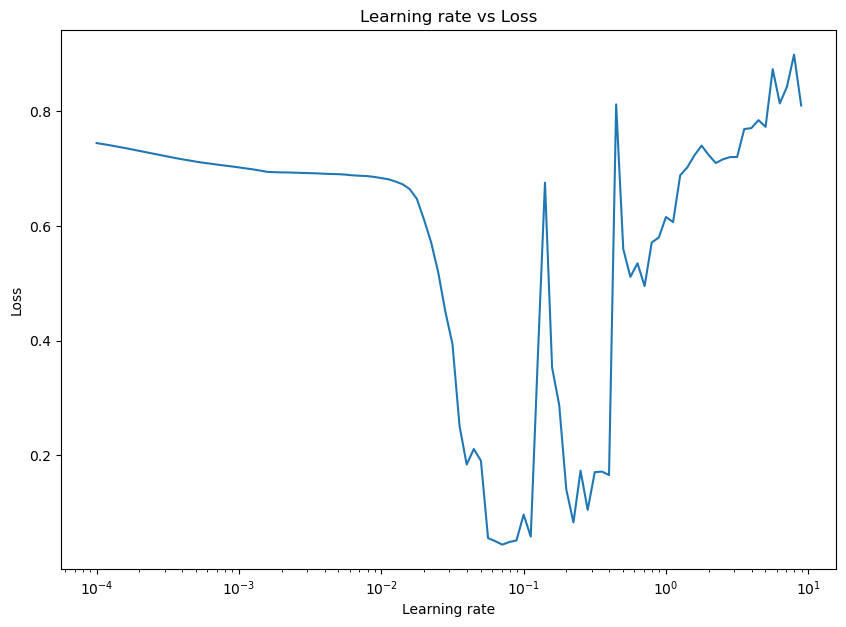

In [52]:
# Plot the learning rate vs the loss
lrs = histor_9.history['lr']
plt.figure(figsize= (10, 7))
plt.semilogx(lrs, histor_9.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show()

In [53]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [63]:
# Let's use a higher *ideal* learning rate with same model

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_10.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.05),
              metrics= ['accuracy'])

histor_10 = model_10.fit(X_train, y_train, epochs= 20)

Epoch 1/20
25/25 [==============================] - 0s 548us/step - loss: 0.6941 - accuracy: 0.4975
Epoch 2/20
25/25 [==============================] - 0s 514us/step - loss: 0.6729 - accuracy: 0.5788
Epoch 3/20
25/25 [==============================] - 0s 518us/step - loss: 0.6627 - accuracy: 0.5813
Epoch 4/20
25/25 [==============================] - 0s 420us/step - loss: 0.5769 - accuracy: 0.7063
Epoch 5/20
25/25 [==============================] - 0s 348us/step - loss: 0.4206 - accuracy: 0.8300
Epoch 6/20
25/25 [==============================] - 0s 356us/step - loss: 0.2191 - accuracy: 0.9488
Epoch 7/20
25/25 [==============================] - 0s 361us/step - loss: 0.1313 - accuracy: 0.9600
Epoch 8/20
25/25 [==============================] - 0s 365us/step - loss: 0.0794 - accuracy: 0.9812
Epoch 9/20
25/25 [==============================] - 0s 345us/step - loss: 0.0421 - accuracy: 0.9962
Epoch 10/20
25/25 [==============================] - 0s 354us/step - loss: 0.0376 - accuracy: 0.9975

In [55]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 588us/step - loss: 0.6602 - accuracy: 0.5600


[0.6601719856262207, 0.5600000023841858]

In [56]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 716us/step - loss: 0.1069 - accuracy: 0.9850


[0.10688760131597519, 0.9850000143051147]

319/319 [==============================] - 0s 242us/step
doing binary classification
319/319 [==============================] - 0s 243us/step
doing binary classification


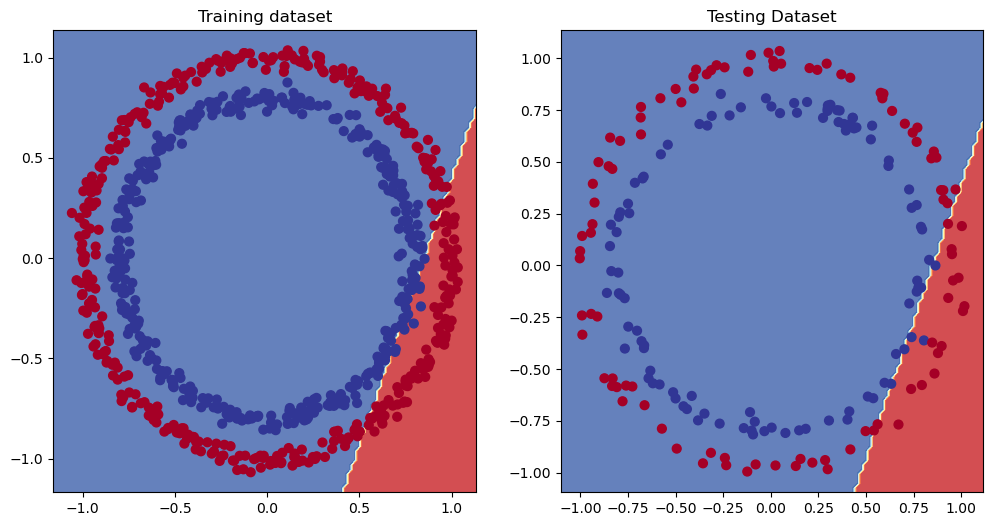

In [57]:
# Plot the decisoin boundaries for the training and test sets

plt.figure(figsize= (12, 6))
plt.subplot(1, 2, 1)
plt.title("Training dataset")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Dataset")
plot_decision_boundary(model_10, X_test, y_test)

## More classification Evaluation Methods

There are other classification evaluation methods which are helpful for monitoring the performance:

* Accuracy
* Precision
* Recall
* F1-score 
* Confusion Matrix
* Classification report from scikit-learn

In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss:.2f}")
print(f"Model accuracy on the test set: {(accuracy * 10):.2f}")

7/7 [==============================] - 0s 626us/step - loss: 0.6602 - accuracy: 0.5600
Model loss on the test set: 0.66
Model accuracy on the test set: 5.60


How about a confusion matrix?

In [64]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
cm

7/7 [==============================] - 0s 468us/step


array([[100,   0],
       [  5,  95]])

In [65]:
y_pred[:10]

array([[9.9993026e-01],
       [2.6977219e-04],
       [9.9949640e-01],
       [1.0833621e-06],
       [9.8817945e-01],
       [4.6441919e-01],
       [1.0846993e-04],
       [4.2922670e-09],
       [9.9947113e-01],
       [1.2104489e-04]], dtype=float32)

Our prediction has come out to in **prediction probability** from standard output

How about we prettify our confusion matrix?

**Note**: the confusion matrix code is a remix of scikit-learn plot_confusion_matrix code

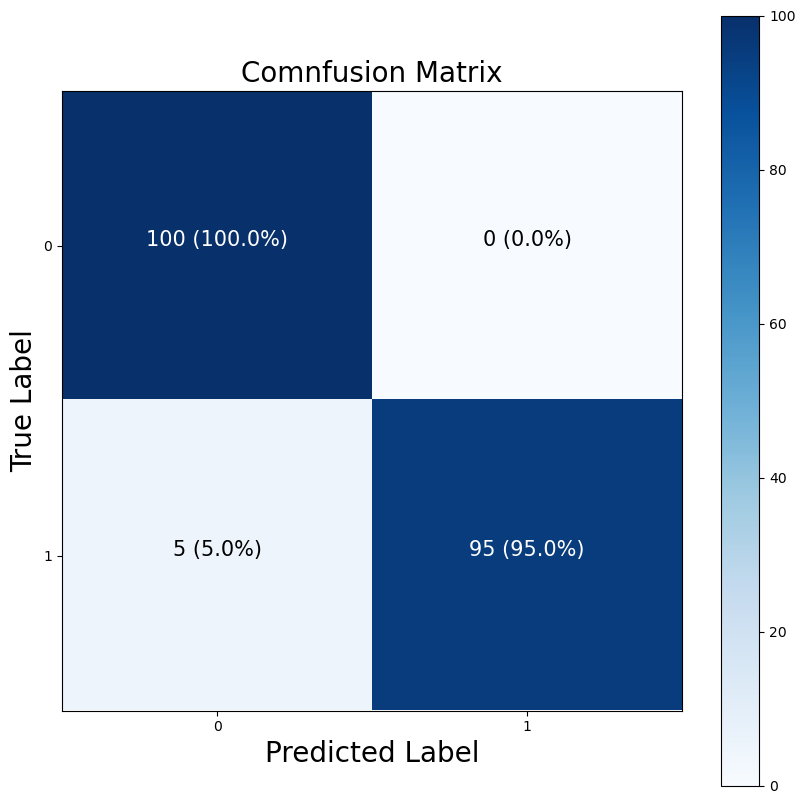

In [71]:
import itertools

figsize = (10, 10)

#Xreate the confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's pretify it
fig, ax = plt.subplots(figsize= figsize)

cax = ax.matshow(cm, cmap= plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

#Label the axes
ax.set(title= "Comnfusion Matrix",
       xlabel= "Predicted Label",
       ylabel= "True Label",
       xticks= np.arange(n_classes),
       yticks= np.arange(n_classes),
       xticklabels= labels,
       yticklabels= labels) 

# Set axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2

#Plot the tect on each cell
for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment= "center", 
             color= "white" if cm[i, j] > threshold else "black",
             size= 15)



In [73]:
def plot_confusion_matrix():
    '''
    Try it out by yourself by using y_true and y_pred as the parameters
    '''

    pass

# Working with larger example (Mulitclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [74]:
from tensorflow.keras.datasets import fashion_mnist

# The dataset is already sorted into training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [76]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [79]:
# Show the first training sample
print(f"Training sample: \n { train_data[0]}\n")
print(f"Training label: \n{train_labels[0]}")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [81]:
# Check the shape of a single sample
train_data[0].shape, train_labels[0].shape

((28, 28), ())

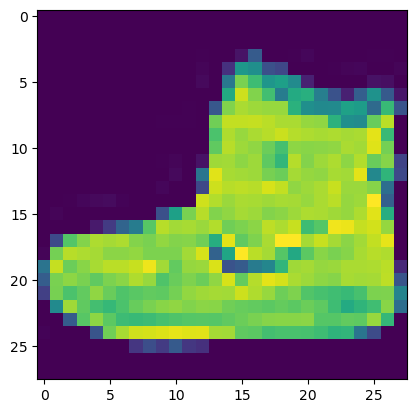

In [82]:
#Plot a single sample
plt.imshow(train_data[0])

In [83]:
# Create a small list so we can index onto out training labels so they're readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

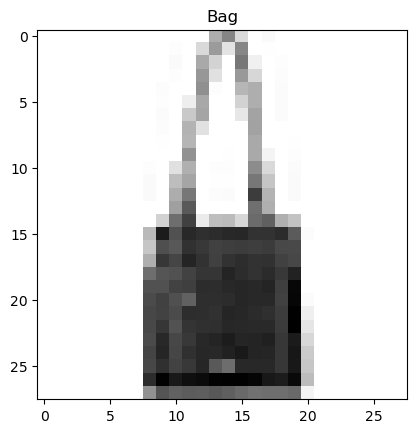

In [87]:
# Plot another image along with its label
index_of_choice = 200
plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

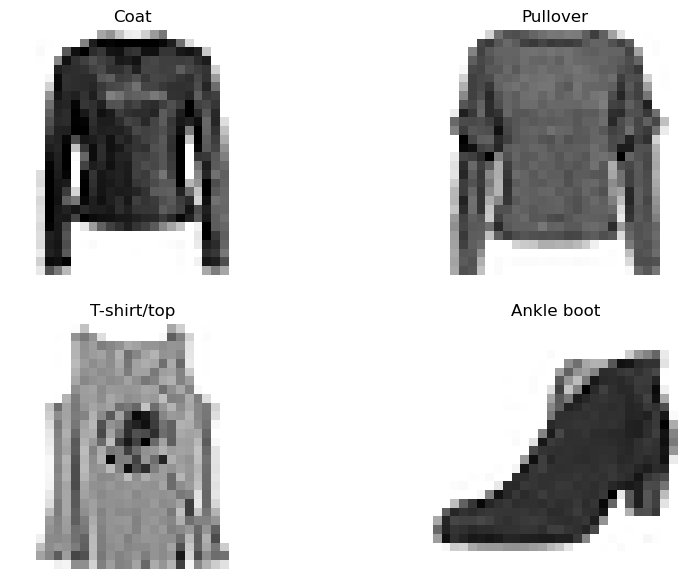

In [103]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize= (10, 7))

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Build a multiclass classification model

Withj a few changes we can use the similar architecture of binary classification. Changes:
* Input shape: (28, 28) **Shape of the image**
* Output shape: 10 **Number of classes**
* Loss function: tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CategoricalCrossentropy()
    * If you labels are in integer form, use SparseCategoricalCrossentropy()
* Output layer activation: **Softmax**

In [107]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ['accuracy'])

non_norm_history = model_11.fit(train_data, 
                                tf.one_hot(train_labels, depth= 10), 
                                epochs= 10, 
                                validation_data= (test_data, tf.one_hot(test_labels, depth= 10)))

Epoch 1/10
1875/1875 [==============================] - 1s 411us/step - loss: 2.2898 - accuracy: 0.1420 - val_loss: 1.9776 - val_accuracy: 0.2027
Epoch 2/10
1875/1875 [==============================] - 1s 379us/step - loss: 1.7724 - accuracy: 0.2462 - val_loss: 1.6819 - val_accuracy: 0.2833
Epoch 3/10
1875/1875 [==============================] - 1s 382us/step - loss: 1.6399 - accuracy: 0.2831 - val_loss: 1.6039 - val_accuracy: 0.3143
Epoch 4/10
1875/1875 [==============================] - 1s 380us/step - loss: 1.5885 - accuracy: 0.3039 - val_loss: 1.5655 - val_accuracy: 0.3059
Epoch 5/10
1875/1875 [==============================] - 1s 370us/step - loss: 1.5582 - accuracy: 0.3193 - val_loss: 1.5440 - val_accuracy: 0.3406
Epoch 6/10
1875/1875 [==============================] - 1s 379us/step - loss: 1.5415 - accuracy: 0.3239 - val_loss: 1.5253 - val_accuracy: 0.3445
Epoch 7/10
1875/1875 [==============================] - 1s 370us/step - loss: 1.5291 - accuracy: 0.3246 - val_loss: 1.5220 -